### 12. Consider the RNN fit to the NYSE data in Section 10.9.6. Modify the code to allow inclusion of the variable day_of_week, and ft the RNN. Compute the test R2.

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data

In [2]:
df = load_data('NYSE')
df

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False
1986-12-26,fri,0.001825,-1.322425,-9.906025,False
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False


In [3]:
from sklearn.preprocessing import LabelEncoder
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,1,-0.004461,0.032573,-13.127403,True
1962-12-04,3,0.007813,0.346202,-11.749305,True
1962-12-05,4,0.003845,0.525306,-11.665609,True
1962-12-06,2,-0.003462,0.210182,-11.626772,True
1962-12-07,0,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1986-12-24,4,0.006514,-0.236104,-9.807366,False
1986-12-26,0,0.001825,-1.322425,-9.906025,False
1986-12-29,1,-0.009515,-0.371237,-9.827660,False


In [4]:
x_lag5 = df.copy()
for i in range(5, 0, -1):
    x_lag5[f'DJ_return_lag_{i}'] = x_lag5['DJ_return'].shift(i)
    x_lag5[f'log_volatility_lag_{i}'] = x_lag5['log_volatility'].shift(i)
    x_lag5[f'log_volume_lag_{i}'] = x_lag5['log_volume'].shift(i)
x_lag5.dropna(inplace=True)
x_lag5

,day_of_week,DJ_return,log_volume,log_volatility,train,DJ_return_lag_5,log_volatility_lag_5,log_volume_lag_5,DJ_return_lag_4,log_volatility_lag_4,log_volume_lag_4,DJ_return_lag_3,log_volatility_lag_3,log_volume_lag_3,DJ_return_lag_2,log_volatility_lag_2,log_volume_lag_2,DJ_return_lag_1,log_volatility_lag_1,log_volume_lag_1
date,,,,,,,,,,,,,,,,,,,,
1962-12-10,1,-0.010824,0.133246,-10.872526,True,-0.004461,-13.127403,0.032573,0.007813,-11.749305,0.346202,0.003845,-11.665609,0.525306,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187
1962-12-11,3,0.000124,-0.011528,-10.977797,True,0.007813,-11.749305,0.346202,0.003845,-11.665609,0.525306,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246
1962-12-12,4,0.003358,0.001607,-11.012360,True,0.003845,-11.665609,0.525306,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246,0.000124,-10.977797,-0.011528
1962-12-13,2,-0.003296,-0.106437,-11.047108,True,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246,0.000124,-10.977797,-0.011528,0.003358,-11.012360,0.001607
1962-12-14,0,0.004469,-0.138269,-11.022063,True,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246,0.000124,-10.977797,-0.011528,0.003358,-11.012360,0.001607,-0.003296,-11.047108,-0.106437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,4,0.006514,-0.236104,-9.807366,False,-0.009262,-9.559975,-0.043366,-0.002866,-9.652473,0.025079,0.008345,-9.644138,0.986704,-0.001385,-9.746214,0.366152,-0.006150,-9.782214,0.450780
1986-12-26,0,0.001825,-1.322425,-9.906025,False,-0.002866,-9.652473,0.025079,0.008345,-9.644138,0.986704,-0.001385,-9.746214,0.366152,-0.006150,-9.782214,0.450780,0.006514,-9.807366,-0.236104
1986-12-29,1,-0.009515,-0.371237,-9.827660,False,0.008345,-9.644138,0.986704,-0.001385,-9.746214,0.366152,-0.006150,-9.782214,0.450780,0.006514,-9.807366,-0.236104,0.001825,-9.906025,-1.322425


In [5]:
y = x_lag5['log_volume']
train = x_lag5['train']

In [6]:
x_lag5.drop(columns=['DJ_return', 'log_volume', 'log_volatility', 'train'], inplace=True)
x_lag5.columns

Index(['day_of_week', 'DJ_return_lag_5', 'log_volatility_lag_5',
       'log_volume_lag_5', 'DJ_return_lag_4', 'log_volatility_lag_4',
       'log_volume_lag_4', 'DJ_return_lag_3', 'log_volatility_lag_3',
       'log_volume_lag_3', 'DJ_return_lag_2', 'log_volatility_lag_2',
       'log_volume_lag_2', 'DJ_return_lag_1', 'log_volatility_lag_1',
       'log_volume_lag_1'],
      dtype='object')

In [7]:
x_lag5 = x_lag5.to_numpy().reshape((-1, 1, 16))
x_lag5.shape

(6046, 1, 16)

In [8]:
import torch
from torch.utils.data import TensorDataset
datasets = []

for mask in [train, ~train]:
    x_t = torch.tensor(x_lag5[mask].astype(np.float32))
    y_t = torch.tensor(y[mask].values.astype(np.float32))
    datasets.append(TensorDataset(x_t, y_t))
df_train, df_test = datasets

In [9]:
from torch import nn

class RNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(16, 12, batch_first=True)
        self.linear = nn.Linear(12, 1)
        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        val, h_n = self.rnn(x)
        val = self.linear(self.dropout(val[:,-1]))
        return torch.flatten(val)

In [10]:
model = RNN()

In [11]:
from torchinfo import summary
summary(model, input_data=x_t, col_names=['input_size', 'output_size'])

Layer (type:depth-idx)                   Input Shape               Output Shape
RNN                                      [1770, 1, 16]             [1770]
├─RNN: 1-1                               [1770, 1, 16]             [1770, 1, 12]
├─Dropout: 1-2                           [1770, 12]                [1770, 12]
├─Linear: 1-3                            [1770, 12]                [1770, 1]
Total params: 373
Trainable params: 373
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.66
Input size (MB): 0.11
Forward/backward pass size (MB): 0.18
Params size (MB): 0.00
Estimated Total Size (MB): 0.30

In [12]:
from ISLP.torch import SimpleDataModule, SimpleModule, ErrorTracker
from torch.optim import RMSprop
from torchmetrics import R2Score

optim = RMSprop(model.parameters(), lr=0.001)
module = SimpleModule.regression(model, metrics={'r2' : R2Score()}, optimizer=optim)

data_module = SimpleDataModule(df_train, df_test, batch_size=64, num_workers=4)

In [13]:
from pytorch_lightning import Trainer

trainer = Trainer(deterministic=True, max_epochs=200, callbacks=[ErrorTracker()])
trainer.fit(module, datamodule=data_module)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type    | Params
----------------------------------
0 | model | RNN     | 373   
1 | loss  | MSELoss | 0     
----------------------------------
373       Trainable params
0         Non-trainable params
373       Total params
0.001     Total estimated model params size (M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:104: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [14]:
trainer.test(module, datamodule=data_module)

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.033228348940610886
         test_r2            0.4224233627319336
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.033228348940610886, 'test_r2': 0.4224233627319336}]

In [15]:
model.eval()
yhat = model(x_t).detach().numpy()

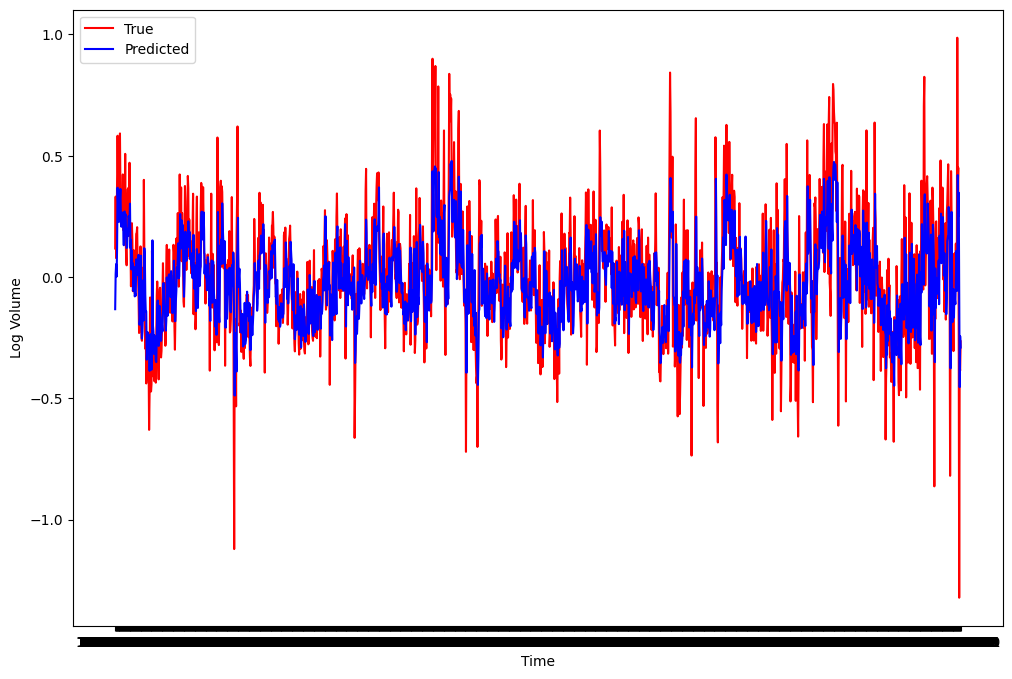

In [17]:
import matplotlib.pyplot as plt

x = df.index.drop(df.index[:5])[~train]
plt.figure(figsize=(12, 8))
plt.plot(x, y[~train], color='r', label='True')
plt.plot(x, yhat, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Log Volume')
plt.legend()
plt.show()